In [71]:
import numpy as np
import pandas as pd
from rdflib.util import more_than
from datetime import datetime as dt

file_path = "../Dataset/restaurant_orders.csv"
ddf = pd.read_csv(file_path)

df = ddf.copy()
df['final'] = (df['Price'] * df['Quantity']).round(2)
df['Customer count'] = df.groupby('Customer Name')['Customer Name'].transform('count')
df


,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,final,Customer count
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,1
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,1
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,1
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,1
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,1
...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,1
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,1
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,1
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        500 non-null    int64  
 1   Customer Name   500 non-null    object 
 2   Food Item       500 non-null    object 
 3   Category        500 non-null    object 
 4   Quantity        500 non-null    int64  
 5   Price           500 non-null    float64
 6   Payment Method  500 non-null    object 
 7   Order Time      500 non-null    object 
 8   final           500 non-null    float64
 9   Customer count  500 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


In [73]:
df.describe()

,Order ID,Quantity,Price,final,Customer count
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5683.296000,3.030000,13.197180,40.046280,1.012000
std,2599.688068,1.474261,6.685852,29.773338,0.108994
min,1055.000000,1.000000,2.060000,2.460000,1.000000
25%,3342.000000,2.000000,7.280000,15.562500,1.000000
50%,5762.000000,3.000000,13.305000,30.780000,1.000000
75%,7945.000000,4.000000,19.080000,61.032500,1.000000
max,9997.000000,5.000000,24.990000,124.400000,2.000000


In [74]:
from datetime import datetime
df['hour'] = df['Order Time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour)
df

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,final,Customer count,hour
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,82.60,1,14
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,69.08,1,10
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,3.37,1,7
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,11.00,1,12
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,12.23,1,14
...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,21.31,1,19
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,47.97,1,15
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,17.08,1,23
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,102.70,1,8


In [75]:
def meal_time(hour):
    if 0 <= hour < 12:
        return '0-Morning'
    elif 12 <= hour < 17:
        return '1-Noon'
    else:
        return '2-Evening'

In [76]:
df['Meal Time'] = df['hour'].apply(meal_time)

In [77]:
df.groupby(['Meal Time', 'Food Item']).size().unstack(fill_value=0)

Food Item,Brownie,Burger,Cake,Fries,Ice Cream,Pasta,Pizza,Salad,Soup
Meal Time,,,,,,,,,
0-Morning,31,27,30,32,27,19,29,27,23
1-Noon,11,11,9,19,12,15,11,13,16
2-Evening,21,13,14,9,13,14,28,15,11


<Axes: xlabel='Meal Time'>

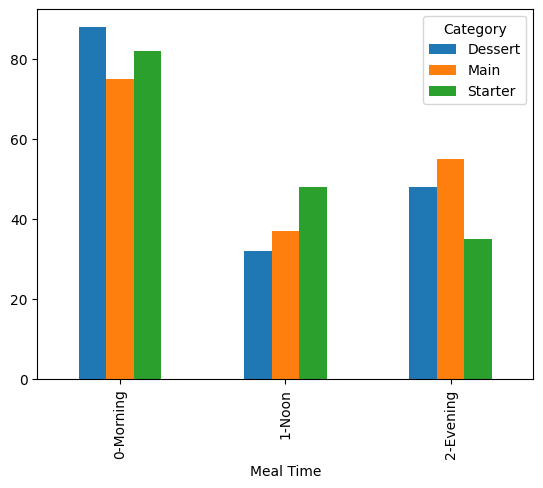

In [78]:
df.groupby(['Meal Time', 'Category']).size().unstack(fill_value=0).plot.bar()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        500 non-null    int64  
 1   Customer Name   500 non-null    object 
 2   Food Item       500 non-null    object 
 3   Category        500 non-null    object 
 4   Quantity        500 non-null    int64  
 5   Price           500 non-null    float64
 6   Payment Method  500 non-null    object 
 7   Order Time      500 non-null    object 
 8   final           500 non-null    float64
 9   Customer count  500 non-null    int64  
 10  hour            500 non-null    int64  
 11  Meal Time       500 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 47.0+ KB


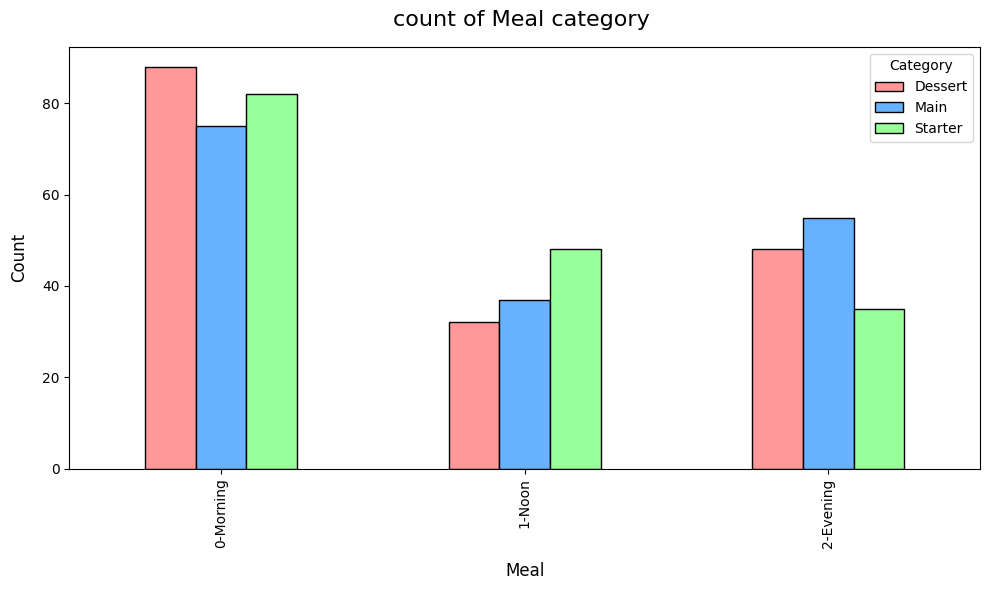

In [80]:
from matplotlib import pyplot as plt
result = df.groupby(['Meal Time', 'Category']).size().unstack(fill_value=0)
colors = ['#FF9999','#66B2FF','#99FF99']
ax = result.plot.bar(figsize=(10,6), stacked=False, color=colors, edgecolor='black')
ax.set_title("count of Meal category ", fontsize=16, pad=15)
ax.set_xlabel("Meal", fontsize=12, labelpad=10)
ax.set_ylabel("Count", fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()

In [84]:
df['Order Time'] = pd.to_datetime(df['Order Time'])
df['dayofweek'] = df['Order Time'].dt.dayofweek
df['day_name'] = df['Order Time'].dt.day_name()
df.pivot_table(index='Meal Time', columns='day_name', values='final', aggfunc='sum')

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Meal Time,,,,,,,
0-Morning,1229.34,1775.58,1058.29,1813.76,898.61,1211.16,1440.17
1-Noon,660.72,538.68,846.85,748.32,1148.35,636.44,545.13
2-Evening,982.38,565.16,590.25,785.78,1049.75,596.39,902.03


<Axes: xlabel='day_name', ylabel='Meal Time'>

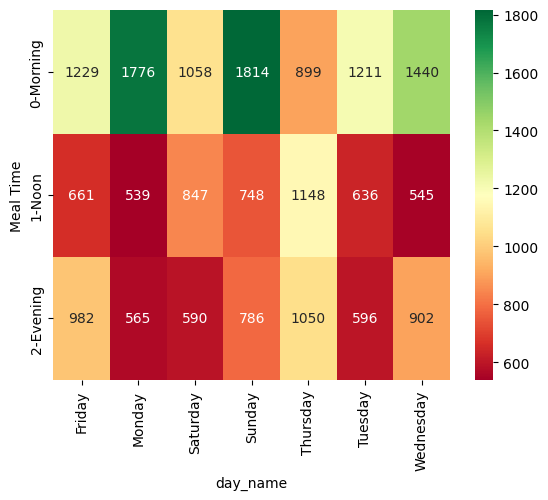

In [101]:
import seaborn as sns
sns.heatmap(df.pivot_table(index='Meal Time', columns='day_name', values='final', aggfunc='sum').round(),annot=True, fmt='g',cmap='RdYlGn')